By: 10117094	Muhammad Walidin
    10116476	Idham Rahadian
    10116490	Muhammad Fajar Maulana

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import re
import os
import itertools
import collections
import string
import pandas as pd
import numpy as np
from collections import OrderedDict

In [2]:
df = pd.read_csv("data/20191002-reviews.csv")
df

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203782,9467899,shop-televisi-digital,Isharyanto S.,5,NaN,murah,barang bagus dengan harga kompetitif,6,6,0,True,24.63,22 Nov 2016,desktop,2019-10-02
203783,9467899,shop-televisi-digital,FIRLY B.,3,NaN,barang bagus dan sesuai pesanan,NaN,0,0,0,True,14.01,10 Apr 2018,androidApp,2019-10-02
203784,9548087,shop-televisi-digital,soni s.,5,NaN,NaN,NaN,0,0,0,True,15.63,04 Jan 2018,androidApp,2019-10-02
203785,9548767,shop-televisi-digital,Saidhusin H.,3,NaN,AKARI LED TV,Ok.thank lazada Pagi order sore barang nyampe ...,0,0,0,True,19.48,15 Nov 2016,mobile-app,2019-10-02


In [3]:
#Menampilkan informasi dari jumlah kolom dan baris, serta lima sampel teratas dari dataframe df_items
print('shape : {}'.format(df.shape))
df.head()

shape : (203787, 15)


,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02


In [4]:
#Mengambil 1 item sebagai sampel untuk dicermati
df[df['itemId'] == 100002528]

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02
5,100002528,beli-harddisk-eksternal,Deden,5,NaN,NaN,NaN,0,0,0,True,16.01,02 Nov 2017,androidApp,2019-10-02
6,100002528,beli-harddisk-eksternal,Yeana,5,NaN,NaN,NaN,0,0,0,True,13.01,25 Sep 2017,mobile,2019-10-02
7,100002528,beli-harddisk-eksternal,nurfarida,1,NaN,ada pengirimn ntb bima,bima,4,4,0,True,7.22,NaN,androidApp,2019-10-02
88004,100002528,beli-smart-tv,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
88005,100002528,beli-smart-tv,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02


In [5]:
df.category.value_counts()

beli-harddisk-eksternal    82223
jual-flash-drives          64754
beli-smart-tv              29765
shop-televisi-digital      21264
beli-laptop                 5781
Name: category, dtype: int64

In [6]:
#Melihat apakah setiap item memiliki satu kategory atau lebih
#Satu kategori
cat1 = len(pd.concat(g for _, g in df.groupby(['itemId']) if len(g) == 1))
print('Satu kategori :', cat1)

#Dua kategori
cat2 = len(pd.concat(g for _, g in df.groupby(['itemId']) if len(g) == 2))
print('Dua kategori :', cat2)

#Tiga kategori
cat3 = len(pd.concat(g for _, g in df.groupby(['itemId']) if len(g) == 3))
print('Tiga kategori :', cat3)

#Empat kategori
cat4 = len(pd.concat(g for _, g in df.groupby(['itemId']) if len(g) == 4))
print('Empat kategori :', cat4)

#Lima kategori
cat5 = len(pd.concat(g for _, g in df.groupby(['itemId']) if len(g) == 5))
print('Lima kategori :', cat5)

Satu kategori : 367
Dua kategori : 1806
Tiga kategori : 357
Empat kategori : 2140
Lima kategori : 1985


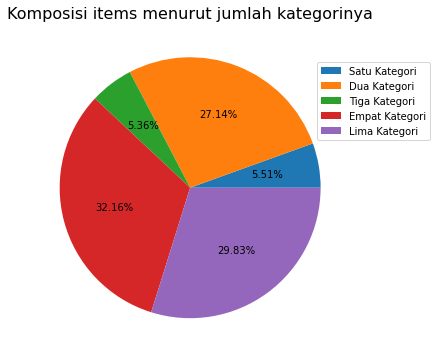

In [9]:
#Visualisasi piecat
cat = np.array([cat1, cat2, cat3, cat4, cat5])
cat_percentile = []
for i in cat:
    x = i/np.sum(cat)
    cat_percentile.append(x)
     

fig, ax = plt.subplots(figsize = (8, 6))

labels = ['Satu Kategori', 'Dua Kategori', 'Tiga Kategori', 'Empat Kategori', 'Lima Kategori']
ax.pie(x = cat_percentile,
       autopct = '%1.2f%%')
ax.set_title(label = 'Komposisi items menurut jumlah kategorinya', size = 16)
ax.legend(labels, loc = 'upper right', bbox_to_anchor=(1.25, 0.9))
plt.show()

In [10]:
#Menampilkan sampel data yang memiliki jumlah kategori = 1
df_items_cat1 = pd.concat(g for _, g in df.groupby(['itemId']) if len(g) == 1)
df_items_cat1.head()

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
69683,50409,beli-harddisk-eksternal,Lazada Guest,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Jul 2014,androidApp,2019-10-02
75964,64523,beli-harddisk-eksternal,Guest,5,NaN,Baik !!,"Puas, kecil tapi kencang.",0,0,0,True,19.03,17 Mar 2015,desktop,2019-10-02
82062,92424,beli-harddisk-eksternal,Masitah,5,NaN,NaN,NaN,0,0,0,True,13.01,09 Agu 2014,desktop,2019-10-02
9417,122091,beli-harddisk-eksternal,Ayub I.,1,NaN,Barang berbeda,Barang yang datang bukan baracuda 3.5 7200rpm ...,0,0,0,True,19.50,06 Feb 2017,mobile-app,2019-10-02
9427,122145,beli-harddisk-eksternal,Tara A.,5,NaN,NaN,"Thanks barang sudah sampai, sehari langsung sa...",0,0,0,True,16.26,NaN,desktop,2019-10-02


In [11]:
#Menampilkan sampel data yang memiliki jumlah kategori = 2
df_items_cat2 = pd.concat(g for _, g in df.groupby(['itemId']) if len(g) == 2)

print(df_items_cat2.category.value_counts(), '\n')
df_items_cat2.head(6)

beli-harddisk-eksternal    1051
jual-flash-drives           755
Name: category, dtype: int64 



,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
63977,45076,beli-harddisk-eksternal,Lazada Customer,5,NaN,NaN,NaN,0,0,0,True,19.01,16 Des 2017,androidApp,2019-10-02
165953,45076,jual-flash-drives,Lazada Customer,5,NaN,NaN,NaN,0,0,0,True,19.01,16 Des 2017,androidApp,2019-10-02
76063,65242,beli-harddisk-eksternal,anyn,5,NaN,NaN,NaN,0,0,0,True,17.01,13 Nov 2014,androidApp,2019-10-02
177222,65242,jual-flash-drives,anyn,5,NaN,NaN,NaN,0,0,0,True,17.01,13 Nov 2014,androidApp,2019-10-02
76236,66221,beli-harddisk-eksternal,Tifany H.,5,NaN,NaN,NaN,0,0,0,True,18.01,20 Apr 2017,iosApp,2019-10-02
177375,66221,jual-flash-drives,Tifany H.,5,NaN,NaN,NaN,0,0,0,True,18.01,20 Apr 2017,iosApp,2019-10-02


In [12]:
#Menampilkan sampel data dengan kategori = 3
df_items_cat3 = pd.concat(g for _, g in df.groupby(['itemId']) if len(g) == 3)
print(df_items_cat3.category.value_counts(), '\n')
df_items_cat3.head(6)

beli-harddisk-eksternal    314
jual-flash-drives           22
beli-smart-tv               21
Name: category, dtype: int64 



,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
82204,96876,beli-harddisk-eksternal,Dhevia D.,5,NaN,.,puas dengan barangnya! :),0,0,0,True,19.25,16 Jul 2016,desktop,2019-10-02
82205,96876,beli-harddisk-eksternal,Erlin P.,5,NaN,NaN,NaN,0,0,0,True,17.01,22 Agu 2016,androidApp,2019-10-02
82206,96876,beli-harddisk-eksternal,Dimas A.,5,NaN,NaN,NaN,0,0,0,True,14.99,27 Des 2016,androidApp,2019-10-02
6079,112981,beli-harddisk-eksternal,Lazada Customer,5,NaN,Oke,Terima kasih barang bekerja dengan baik tidak ...,0,0,0,True,21.96,11 Mei 2017,androidApp,2019-10-02
6080,112981,beli-harddisk-eksternal,Dika,5,NaN,Puas,Barang sudah sampai sesuai waktu yang telah di...,3,3,0,True,21.33,NaN,mobile-app,2019-10-02
6081,112981,beli-harddisk-eksternal,Lazada Customer,5,NaN,NaN,NaN,0,0,0,True,16.01,02 Okt 2018,androidApp,2019-10-02


In [13]:
_ = df_items_cat3[~df_items_cat3['name'].str.contains('smart', flags=re.IGNORECASE, regex = True)]
print('Jumlah kolom : ', len(_))
_.head()

Jumlah kolom :  357


,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
82204,96876,beli-harddisk-eksternal,Dhevia D.,5,NaN,.,puas dengan barangnya! :),0,0,0,True,19.25,16 Jul 2016,desktop,2019-10-02
82205,96876,beli-harddisk-eksternal,Erlin P.,5,NaN,NaN,NaN,0,0,0,True,17.01,22 Agu 2016,androidApp,2019-10-02
82206,96876,beli-harddisk-eksternal,Dimas A.,5,NaN,NaN,NaN,0,0,0,True,14.99,27 Des 2016,androidApp,2019-10-02
6079,112981,beli-harddisk-eksternal,Lazada Customer,5,NaN,Oke,Terima kasih barang bekerja dengan baik tidak ...,0,0,0,True,21.96,11 Mei 2017,androidApp,2019-10-02
6080,112981,beli-harddisk-eksternal,Dika,5,NaN,Puas,Barang sudah sampai sesuai waktu yang telah di...,3,3,0,True,21.33,NaN,mobile-app,2019-10-02


In [14]:
#Menampilkan sampel dari jumlah kategori = 4
df_items_cat4 = pd.concat(g for _, g in df.groupby(['itemId']) if len(g) == 4)
print(df_items_cat4.category.value_counts(), '\n')
df_items_cat4.head(8)

beli-harddisk-eksternal    1000
jual-flash-drives           764
beli-smart-tv               188
shop-televisi-digital       188
Name: category, dtype: int64 



,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
30752,25850,beli-harddisk-eksternal,Riska,3,NaN,OKE,Everthing is OK.. Thanks Lazada..,0,0,0,True,21.51,19 Apr 2014,desktop,2019-10-02
96215,25850,beli-smart-tv,Riska,3,NaN,OKE,Everthing is OK.. Thanks Lazada..,0,0,0,True,21.51,19 Apr 2014,desktop,2019-10-02
136809,25850,jual-flash-drives,Riska,3,NaN,OKE,Everthing is OK.. Thanks Lazada..,0,0,0,True,21.51,19 Apr 2014,desktop,2019-10-02
190628,25850,shop-televisi-digital,Riska,3,NaN,OKE,Everthing is OK.. Thanks Lazada..,0,0,0,True,21.51,19 Apr 2014,desktop,2019-10-02
63928,44569,beli-harddisk-eksternal,syaiful A.,5,NaN,NaN,NaN,0,0,0,True,24.01,30 Mei 2019,androidApp,2019-10-02
63929,44569,beli-harddisk-eksternal,Borneo B.,5,NaN,NaN,NaN,0,0,0,True,16.01,11 Nov 2014,androidApp,2019-10-02
165910,44569,jual-flash-drives,syaiful A.,5,NaN,NaN,NaN,0,0,0,True,24.01,30 Mei 2019,androidApp,2019-10-02
165911,44569,jual-flash-drives,Borneo B.,5,NaN,NaN,NaN,0,0,0,True,16.01,11 Nov 2014,androidApp,2019-10-02


In [15]:
keyword = '|'.join(['tv', 'led'])

_ = df_items_cat4[~df_items_cat4['name'].str.contains(keyword, flags=re.IGNORECASE, regex = True)]
print(len(_))
_.head()

2140


,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
30752,25850,beli-harddisk-eksternal,Riska,3,NaN,OKE,Everthing is OK.. Thanks Lazada..,0,0,0,True,21.51,19 Apr 2014,desktop,2019-10-02
96215,25850,beli-smart-tv,Riska,3,NaN,OKE,Everthing is OK.. Thanks Lazada..,0,0,0,True,21.51,19 Apr 2014,desktop,2019-10-02
136809,25850,jual-flash-drives,Riska,3,NaN,OKE,Everthing is OK.. Thanks Lazada..,0,0,0,True,21.51,19 Apr 2014,desktop,2019-10-02
190628,25850,shop-televisi-digital,Riska,3,NaN,OKE,Everthing is OK.. Thanks Lazada..,0,0,0,True,21.51,19 Apr 2014,desktop,2019-10-02
63928,44569,beli-harddisk-eksternal,syaiful A.,5,NaN,NaN,NaN,0,0,0,True,24.01,30 Mei 2019,androidApp,2019-10-02


In [16]:
#Menampilkan sampel dari jumlah kategori = 5
df_items_cat5 = pd.concat(g for _, g in df.groupby(['itemId']) if len(g) == 5)
print(df_items_cat5.category.value_counts(), '\n')
df_items_cat5.head()

beli-harddisk-eksternal    581
beli-smart-tv              351
beli-laptop                351
shop-televisi-digital      351
jual-flash-drives          351
Name: category, dtype: int64 



,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
69401,50350,beli-harddisk-eksternal,Lazada Guest,5,NaN,NaN,NaN,0,0,0,True,1.0,NaN,desktop,2019-10-02
87539,50350,beli-laptop,Lazada Guest,5,NaN,NaN,NaN,0,0,0,True,1.0,NaN,desktop,2019-10-02
114935,50350,beli-smart-tv,Lazada Guest,5,NaN,NaN,NaN,0,0,0,True,1.0,NaN,desktop,2019-10-02
171044,50350,jual-flash-drives,Lazada Guest,5,NaN,NaN,NaN,0,0,0,True,1.0,NaN,desktop,2019-10-02
201594,50350,shop-televisi-digital,Lazada Guest,5,NaN,NaN,NaN,0,0,0,True,1.0,NaN,desktop,2019-10-02


In [17]:
#Kategori 2
df_items_cat2 = df_items_cat2[df_items_cat2['category'] == 'jual-flash-drives']

#Kategori 3
df_items_cat3 = df_items_cat3[df_items_cat3['category'] == 'beli-smart-tv']

#Kategori 4
df_items_cat4 = df_items_cat4[df_items_cat4['category'] == 'shop-televisi-digital']

#Kategori 5
df_items_cat5 = df_items_cat5[df_items_cat5['category'] == 'beli-laptop']

print(df_items_cat1.category.value_counts(),'\n')
print(df_items_cat2.category.value_counts(),'\n')
print(df_items_cat3.category.value_counts(),'\n')
print(df_items_cat4.category.value_counts(),'\n')
print(df_items_cat5.category.value_counts())

beli-harddisk-eksternal    367
Name: category, dtype: int64 

jual-flash-drives    755
Name: category, dtype: int64 

beli-smart-tv    21
Name: category, dtype: int64 

shop-televisi-digital    188
Name: category, dtype: int64 

beli-laptop    351
Name: category, dtype: int64


In [18]:
#Menggabungkan dataframe
df_reviews_clean = pd.concat([df_items_cat1, df_items_cat2, df_items_cat3, df_items_cat4, df_items_cat5],
                          axis = 0)
df_reviews_clean.reset_index(drop= True, inplace = True)
print(df_reviews_clean.info(), '\n')
print(df_reviews_clean.category.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   itemId          1682 non-null   int64  
 1   category        1682 non-null   object 
 2   name            1682 non-null   object 
 3   rating          1682 non-null   int64  
 4   originalRating  0 non-null      float64
 5   reviewTitle     317 non-null    object 
 6   reviewContent   844 non-null    object 
 7   likeCount       1682 non-null   int64  
 8   upVotes         1682 non-null   int64  
 9   downVotes       1682 non-null   int64  
 10  helpful         1682 non-null   bool   
 11  relevanceScore  1682 non-null   float64
 12  boughtDate      1541 non-null   object 
 13  clientType      1682 non-null   object 
 14  retrievedDate   1682 non-null   object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 185.7+ KB
None 

jual-flash-drives          755
beli-harddisk-eks

In [19]:
#Mengecek apakah kolom likeCount dan upVotes memiliki nilai yang sama
print(df_reviews_clean.likeCount.equals(df_reviews_clean.upVotes))

True


In [20]:
#Mengeliminasi kolom originalRating, likeCount, retrievedDate
df_reviews_clean = df_reviews_clean.drop(columns=['originalRating', 'likeCount', 'retrievedDate'])
df_reviews_clean.head()

,itemId,category,name,rating,reviewTitle,reviewContent,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType
0,50409,beli-harddisk-eksternal,Lazada Guest,5,NaN,NaN,0,0,True,16.01,17 Jul 2014,androidApp
1,64523,beli-harddisk-eksternal,Guest,5,Baik !!,"Puas, kecil tapi kencang.",0,0,True,19.03,17 Mar 2015,desktop
2,92424,beli-harddisk-eksternal,Masitah,5,NaN,NaN,0,0,True,13.01,09 Agu 2014,desktop
3,122091,beli-harddisk-eksternal,Ayub I.,1,Barang berbeda,Barang yang datang bukan baracuda 3.5 7200rpm ...,0,0,True,19.50,06 Feb 2017,mobile-app
4,122145,beli-harddisk-eksternal,Tara A.,5,NaN,"Thanks barang sudah sampai, sehari langsung sa...",0,0,True,16.26,NaN,desktop


In [21]:
print('Jumlah NaN value pada reviewTitle : ', len(df_reviews_clean[df_reviews_clean.reviewTitle.isna() == True]))

#Mengganti nilai NaN
df_reviews_clean.reviewTitle.fillna('Tanpa Judul', inplace = True)
print('Jumlah NaN value pada reviewTitle : ', len(df_reviews_clean[df_reviews_clean.reviewTitle.isna() == True]))

Jumlah NaN value pada reviewTitle :  1365
Jumlah NaN value pada reviewTitle :  0


In [22]:
df_reviews_clean[df_reviews_clean.boughtDate.isna() == True].head()

,itemId,category,name,rating,reviewTitle,reviewContent,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType
4,122145,beli-harddisk-eksternal,Tara A.,5,Tanpa Judul,"Thanks barang sudah sampai, sehari langsung sa...",0,0,True,16.26,NaN,desktop
5,123635,beli-harddisk-eksternal,Olivia H.,5,Tanpa Judul,NaN,0,0,True,1.25,NaN,desktop
10,170671,beli-harddisk-eksternal,Lazada Guest,5,Tanpa Judul,NaN,0,0,True,1.19,NaN,desktop
11,170681,beli-harddisk-eksternal,Lazada Guest,5,Tanpa Judul,NaN,0,0,True,1.19,NaN,desktop
13,270768,beli-harddisk-eksternal,Jocelyn L.,5,Tanpa Judul,"so far ... puas dengan produk ini , harga dan ...",0,1,True,16.27,NaN,desktop


In [23]:
print('Jumlah NaN value pada reviewContent : ', len(df_reviews_clean[df_reviews_clean.reviewContent.isna() == True]))

#Mengganti nilai NaN
df_reviews_clean.reviewContent.fillna('Tidak ada review', inplace = True)
print('Jumlah NaN value pada reviewTitle : ', len(df_reviews_clean[df_reviews_clean.reviewContent.isna() == True]))

Jumlah NaN value pada reviewContent :  838
Jumlah NaN value pada reviewTitle :  0


In [24]:
df_reviews_clean.head()

,itemId,category,name,rating,reviewTitle,reviewContent,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType
0,50409,beli-harddisk-eksternal,Lazada Guest,5,Tanpa Judul,Tidak ada review,0,0,True,16.01,17 Jul 2014,androidApp
1,64523,beli-harddisk-eksternal,Guest,5,Baik !!,"Puas, kecil tapi kencang.",0,0,True,19.03,17 Mar 2015,desktop
2,92424,beli-harddisk-eksternal,Masitah,5,Tanpa Judul,Tidak ada review,0,0,True,13.01,09 Agu 2014,desktop
3,122091,beli-harddisk-eksternal,Ayub I.,1,Barang berbeda,Barang yang datang bukan baracuda 3.5 7200rpm ...,0,0,True,19.50,06 Feb 2017,mobile-app
4,122145,beli-harddisk-eksternal,Tara A.,5,Tanpa Judul,"Thanks barang sudah sampai, sehari langsung sa...",0,0,True,16.26,NaN,desktop


In [25]:
df_reviews_clean.tail()

,itemId,category,name,rating,reviewTitle,reviewContent,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType
1677,700890407,beli-laptop,Lazada Customer,5,Tanpa Judul,barang sampai tepat waktu sesuai target Lazada...,0,0,True,57.17,21 Sep 2019,androidApp
1678,702174036,beli-laptop,Dimas P.,5,Tanpa Judul,"Pelayanannya sangat bagus, barang sesuai denga...",0,0,True,40.00,27 Sep 2019,androidApp
1679,702254981,beli-laptop,Yuly S.,5,Tanpa Judul,Barang sampai lebih cepat dan dalam kondisi sa...,0,0,True,40.00,24 Sep 2019,androidApp
1680,706346706,beli-laptop,Lazada Customer,5,Tanpa Judul,ok,0,0,True,25.15,21 Sep 2019,androidApp
1681,706700032,beli-laptop,Lazada Customer,3,Tanpa Judul,Bonus nya bohong gak ada,0,0,True,34.30,26 Sep 2019,androidApp


In [26]:
df_reviews_clean.to_csv(r'data/data/data_raw.csv', index=False)

In [27]:
df_super_clean = df_reviews_clean[['rating','reviewContent']]

In [28]:
print(df_super_clean)

      rating                                      reviewContent
0          5                                   Tidak ada review
1          5                          Puas, kecil tapi kencang.
2          5                                   Tidak ada review
3          1  Barang yang datang bukan baracuda 3.5 7200rpm ...
4          5  Thanks barang sudah sampai, sehari langsung sa...
...      ...                                                ...
1677       5  barang sampai tepat waktu sesuai target Lazada...
1678       5  Pelayanannya sangat bagus, barang sesuai denga...
1679       5  Barang sampai lebih cepat dan dalam kondisi sa...
1680       5                                                 ok
1681       3                           Bonus nya bohong gak ada

[1682 rows x 2 columns]


In [29]:
df_super_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rating         1682 non-null   int64 
 1   reviewContent  1682 non-null   object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [30]:
df_clean = df_super_clean.rename(columns={'reviewContent':'review'})

In [31]:
df_clean.to_csv(r'data/data/data_raw_clean.csv', index=False)

In [32]:
print(df_clean['review'][4])
print('---------------')
print(df_clean['review'][30])

Thanks barang sudah sampai, sehari langsung sampe untuk sesama Jakarta. Kemasan nya rapi, Thankyou buat lazada dan kenkez
---------------
Barang oke, packaging rapi, dan pengiriman cepat. Beli HDD ini pas lagi Harbolnas (11 Des). Kirain bakalan nyampe lama. Ternyata tgl 14 udah nyampe. Makasih JVP & Lazada
